# Linear Regression over Multivariate data

lets work this time eith boston dataset in sklearn.datasets

- in single feature datasets we got a linear function hx=theta0 + theta1*x
- in two-variate datasets we got a plane hx=theta0 + theta1*x1 + theta2*x2
- in more than two variable datasets we got a hyperplane 

In [193]:
from sklearn.datasets import load_boston

In [194]:
boston = load_boston()

In [195]:
X = boston.data
Y = boston.target

In [196]:
print(X.shape) # see number of features are 13 
print(Y.shape)

(506, 13)
(506,)


## 1. using sklearn to do calculation of theta values for us

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [198]:
# 1. splitting data in training and test part
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [199]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [200]:
# 1. creating an object of model 
alg = LinearRegression(normalize=True)

In [201]:
# 2. training model on training data
alg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [202]:
# 3. predicting the output
Y_pred = alg.predict(X_test)

In [203]:
%matplotlib inline

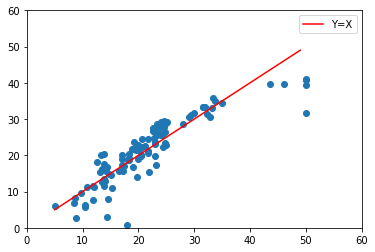

In [204]:
# 4. comparing Y_pred with Y_test using plotting to see how good our model is: graphically
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(Y_test,Y_pred)
ranger = np.arange(5,50)
plt.plot(ranger,ranger,'r',label = 'Y=X')
plt.axis([0,60,0,60])
plt.legend()
plt.show()

#### Coefficeient of Determination (`R square`)
```python
R^2 = 1-u/v 
where 
u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and 
v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
```

#### Interpretation of R^2

```python
- Basically we are predicitng how bad or good our algorithm with respect to (if we predict all values over x_test to be mean value)

- 1.) if our algo predict as bad as means values , u == v is True hence R^2 being Zero score
- 2.) if our algo predict values closer to actual values,  u < v is True hence R^2 being more toward score One-> so better score is good score
- 3.) if our algo predict values far from actual values and worse than mean values,  u > v is True hence R^2 being more toward score Zero 
```     

#### Result 
    higher the score(Coefficient of Determination) better is our algo.

In [205]:
# it internally find the predicted values for X_test using alg model that we fitted and than compare
# it with Y_test that we passed as second argument
test_score = alg.score(X_test,Y_test)
train_score = alg.score(X_train,Y_train) # how well our model remember the data we use to fit the model

In [206]:
test_score, train_score

(0.7777564781924815, 0.7274499023650819)

##### coeffiecients and intercepts

In [207]:
print(len(alg.coef_)) # since there are 13 features there will be 14 parameters value form theta0 to theta13
alg.coef_  # thirteen are here

13


array([-1.15349215e-01,  3.95918123e-02, -5.41898056e-03,  1.50221578e+00,
       -1.66742112e+01,  3.84994242e+00, -8.61653205e-04, -1.41445816e+00,
        3.32628843e-01, -1.33738940e-02, -9.41935637e-01,  1.02146025e-02,
       -5.45569215e-01])

In [208]:
alg.intercept_ # 1 is here

35.8249405786942

## 2. Writting above algo from scratch for multivariate data using Gradient descent

In [180]:
X_train.shape,Y_train.shape

((404, 13), (404,))

In [181]:
# theta will be np.array([theta0,theta1,.............,thetaN])

def hypothesis(X,theta):
    # returning h(Xi) for each sample (Xi) hence returning an array of size X.shape[0]
    return np.sum(X*theta[1:], axis=1) + theta[0]
    
def gradient(X,Y,theta):    
    grad = np.zeros(X.shape[1]+1) # n-featured data have (n+1) parameters.
    hx = hypothesis(X,theta)    
    grad[0] = np.sum((hx-Y))
    for i in range(1,len(grad)) :
        # d(cost) / d(theta[i]) = sum((hx-y)*x[i])
        grad[i] = np.sum((hx-Y)*(X[:,i-1]))
    return grad
    
    
def error(X,Y,theta):
    hx = hypothesis(X,theta)    
    return np.sum((hx-Y)**2)
    
def gradientDescent_multivariate(X,Y,learning_rate=0.0000000000001):
    theta = np.zeros(X.shape[1]+1)
    grad = gradient(X,Y,theta)
    
    error_list = []
    err = error(X,Y,theta)
    error_list.append(err)
        
    while True:
        theta = theta - learning_rate * grad        
        err = error(X,Y,theta)
#         print(err)
        temp = abs(err - error_list[-1]) 
        if temp < 0.0001:
            break
        error_list.append(err)        

    return theta


In [182]:
X_train_nor = (X_train - np.mean(X_train)) / X_train.std()
Y_train_nor = (Y_train - np.mean(Y_train)) / Y_train.std()

In [183]:
tht = gradientDescent_multivariate(X_train_nor,Y_train_nor)

In [184]:
# intercept
tht

array([-2.04281037e-26, -9.47586395e-13,  2.60972667e-12, -9.86164813e-13,
        1.15684170e-14, -1.43953906e-14,  1.35853102e-13, -3.10218858e-12,
        1.59683213e-13, -9.47447699e-13, -2.30795740e-11, -3.08294471e-13,
        8.50412847e-12, -1.47080602e-12])

In [185]:
tht[0]

-2.0428103653102882e-26

In [186]:
from sklearn.metrics import r2_score as ss

In [187]:
Y_pred = hypothesis(X_test,tht)

In [189]:
ss(Y_test,Y_pred)

-6.145733105375133